In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [64]:
plt.ion()
# pd.options.plotting.backend = "plotly"

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

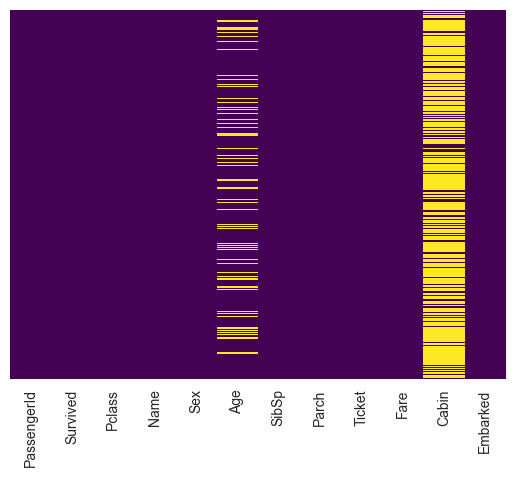

In [66]:
missing_values = train.isnull()

sns.heatmap(missing_values, yticklabels=False, cbar=False, cmap="viridis")

<Axes: xlabel='Survived', ylabel='count'>

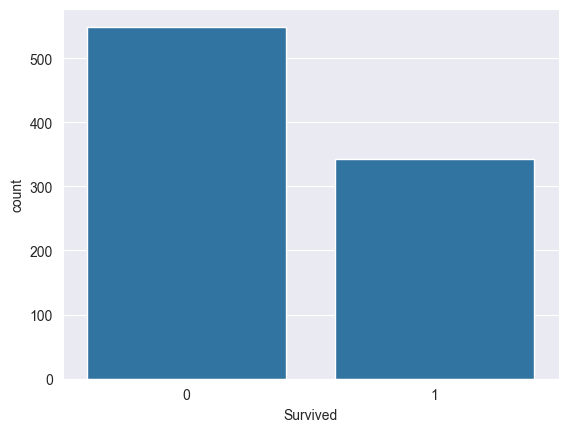

In [67]:
sns.countplot(x='Survived', data=train)

In [68]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: >

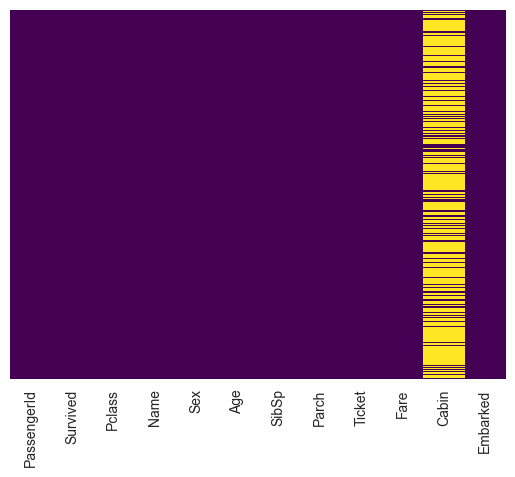

In [69]:
missing_values = train.isnull()
sns.heatmap(missing_values, yticklabels=False, cbar=False, cmap="viridis")

<Axes: >

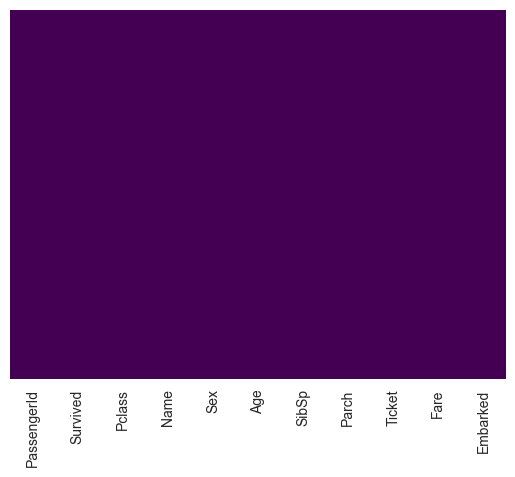

In [70]:
train.drop(columns='Cabin', inplace=True)
test.drop(columns='Cabin', inplace=True)
missing_values = train.isnull()
sns.heatmap(missing_values, yticklabels=False, cbar=False, cmap="viridis")

In [71]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
print(embark)

train.drop(columns=['Sex', 'Embarked', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
pd.concat([train, sex, embark], axis=1)
train.head(20)

         Q      S
0    False   True
1    False  False
2    False   True
3    False   True
4    False   True
..     ...    ...
886  False   True
887  False   True
888  False   True
889  False  False
890   True  False

[891 rows x 2 columns]


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,24.0,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


In [72]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first=True)
print(embark)

test.drop(columns=['Sex', 'Embarked', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
pd.concat([test, sex, embark], axis=1)
test.head(20)

         Q      S
0     True  False
1    False   True
2     True  False
3    False   True
4    False   True
..     ...    ...
413  False   True
414  False  False
415  False   True
416  False   True
417  False  False

[418 rows x 2 columns]


,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875
5,3,14.0,0,0,9.2250
6,3,30.0,0,0,7.6292
7,2,26.0,1,1,29.0000
8,3,18.0,0,0,7.2292
9,3,21.0,2,0,24.1500


In [76]:
x = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(x_train, y_train)

y_pred = logmodel.predict(x_test)
print(classification_report(y_test, y_pred))
print(x_test.iloc[:, 0])

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       110
           1       0.73      0.51      0.60        69

    accuracy                           0.74       179
   macro avg       0.73      0.69      0.70       179
weighted avg       0.74      0.74      0.73       179

495    3
648    3
278    3
31     1
255    3
      ..
780    3
837    3
215    1
833    3
372    3
Name: Pclass, Length: 179, dtype: int64


In [77]:
predict = pd.concat([x_test, pd.DataFrame({'Y Predict': y_pred, 'Y Real': y_test})], axis=1)
predict.head(20)

,Pclass,Age,SibSp,Parch,Fare,Y Predict,Y Real
495,3,24.00,0,0,14.4583,0,0
648,3,24.00,0,0,7.5500,0,0
278,3,7.00,4,1,29.1250,0,0
31,1,37.00,1,0,146.5208,1,1
255,3,29.00,0,2,15.2458,0,1
298,1,37.00,0,0,30.5000,1,1
609,1,40.00,0,0,153.4625,1,1
318,1,31.00,0,2,164.8667,1,1
484,1,25.00,1,0,91.0792,1,1
367,3,24.00,0,0,7.2292,0,1
